# Detecting Fake News

Class link: https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
Access in: April, 15,2022

What is **Fake News**?
A type of yellow journalism, fake news encapsulates pieces of news that may be hoaxes and is generally spread through social media and other online media. This is often done to further or impose certain ideas and is often achieved with political agendas. Such news items may contain false and/or exaggerated claims, and may end up being viralized by algorithms, and users may end up in a filter bubble.

What is a **TfidfVectorizer**?
**TF (Term Frequency)**: The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

**IDF (Inverse Document Frequency)**: Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

In [23]:
#1. import the libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#2. Read the data
df = pd.read_csv('news.csv', sep=',')
df.head()

title  \
8476                        You Can Smell Hillary’s Fear   
10294  Watch The Exact Moment Paul Ryan Committed Pol...   
3608         Kerry to go to Paris in gesture of sympathy   
10142  Bernie supporters on Twitter erupt in anger ag...   
875     The Battle of New York: Why This Primary Matters   

                                                    text label  
8476   Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
10294  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
3608   U.S. Secretary of State John F. Kerry said Mon...  REAL  
10142  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
875    It's primary day in New York and front-runners...  REAL

In [4]:
df.shape

(6335, 3)

In [25]:
#3. Get the labels
y= df.label
y_c=df.label.value_counts()
print(y_c)

REAL    3171
FAKE    3164
Name: label, dtype: int64


c:\users\usuario\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


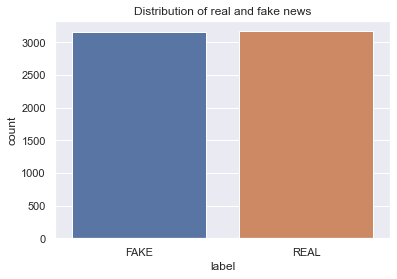

In [28]:
sns.countplot(y)
plt.title("Distribution of real and fake news")
plt.show()

4. Split the dataset into training and testing sets.

In [11]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], y)

# fit and transform the vectorizer on the train set, and transform the vectorizer on the test set.

In [15]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.4)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

# predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

**Passive Aggressive** algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html

In [21]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(C=0.5, max_iter=100)
pac.fit(tfidf_train,y_train)

#Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.88%


In [22]:
#Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[700,  48],
       [ 49, 787]], dtype=int64)

# Another example with Passive Agressive Classifier

In [38]:
# Importing modules
from sklearn.datasets import load_iris
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Loading dataset
dataset = load_iris()
X = dataset.data
y = dataset.target

# Splitting iris dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Creating model
model = PassiveAggressiveClassifier(C = 0.3, random_state = 5)

# Fitting model
model.fit(X_train, y_train)

# Making prediction on test set
test_pred = model.predict(X_test)

# Model evaluation
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred) * 100} %\n\n")

print(f"Classification Report : \n\n{classification_report(y_test, test_pred)}")


Test Set Accuracy : 88.88888888888889 %


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.74      1.00      0.85        14
           2       1.00      0.71      0.83        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.89        45
weighted avg       0.92      0.89      0.89        45



# Predict the sales 

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Advertising.csv")

x = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

data = pd.DataFrame(data={"Predicted Sales": ypred.flatten()})
print(data.head())

   Predicted Sales
0        16.574467
1        20.209574
2        21.457646
3        10.718746
4        22.572385


C:\Users\Usuario\AppData\Local\Temp\ipykernel_18728\376793982.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop(["Sales"], 1))
